# La fusión perfecta: Pandas y Matplotlib

![Gogeta](./img/gogeta_SVL.jpg)

Tanto si estás conociendo un conjunto de datos como si te estás preparando para publicar tus hallazgos, la visualización es una herramienta esencial. La popular biblioteca de análisis de datos de Python, `pandas`, proporciona varias opciones diferentes para visualizar sus datos con `.plot()`. Incluso si estás en el comienzo de tu viaje con pandas, pronto estarás creando gráficos básicos que te darán una valiosa visión de tus datos.

En este tutorial, aprenderás:

- Cuáles son los diferentes tipos de gráficos de `pandas` y cuándo utilizarlos
- Cómo obtener una visión general de su conjunto de datos con un histograma
- Cómo descubrir la correlación con un gráfico de dispersión
- Cómo analizar diferentes categorías y sus ratios

# Cargamos los datos

Este dataset contiene la información detrás del artículo [The Economic Guide To Picking A College Major](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/). El objetivo es hacer una comparación entre los salarios percibidos por los egresados de distintos grados en EEUU.

*All figures in this article, except where otherwise noted, are based on American Community Survey Public Use Microdata Sample files for 2010 through 2012. “Recent” graduates are those under age 28 (roughly within five years of graduation on a normal schedule). Earnings figures are based on people employed full-time (35 hours or more), year-round (50 weeks or more) with positive earnings; except where noted, earnings also exclude those who are in school or who have graduate degrees. I used raw earnings figures, not adjusted for inflation, in order to keep the number round (given low levels of inflation in recent years, it makes minimal difference). The total sample size for recent graduates’ earnings is more than 60,000, but for specific majors, the samples are much smaller, in some cases in the single digits. As a result, don’t read too much into the exact earnings figures for each major; it’s safe to say that librarians earn much less than petroleum engineers, but the sample sizes are much too small to know whether they really earn less than zoologists.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max.columns", None) # Muestra todas las columnas

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"

df = pd.read_csv(download_url)
df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


<table>
<thead>
<tr>
<th>Header</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Rank</code></td>
<td>Rank by median earnings</td>
</tr>
<tr>
<td><code>Major_code</code></td>
<td>Major code, FO1DP in ACS PUMS</td>
</tr>
<tr>
<td><code>Major</code></td>
<td>Major description</td>
</tr>
<tr>
<td><code>Major_category</code></td>
<td>Category of major from Carnevale et al</td>
</tr>
<tr>
<td><code>Total</code></td>
<td>Total number of people with major</td>
</tr>
<tr>
<td><code>Sample_size</code></td>
<td>Sample size (unweighted) of full-time, year-round ONLY (used for earnings)</td>
</tr>
<tr>
<td><code>Men</code></td>
<td>Male graduates</td>
</tr>
<tr>
<td><code>Women</code></td>
<td>Female graduates</td>
</tr>
<tr>
<td><code>ShareWomen</code></td>
<td>Women as share of total</td>
</tr>
<tr>
<td><code>Employed</code></td>
<td>Number employed (ESR == 1 or 2)</td>
</tr>
<tr>
<td><code>Full_time</code></td>
<td>Employed 35 hours or more</td>
</tr>
<tr>
<td><code>Part_time</code></td>
<td>Employed less than 35 hours</td>
</tr>
<tr>
<td><code>Full_time_year_round</code></td>
<td>Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP &gt;= 35)</td>
</tr>
<tr>
<td><code>Unemployed</code></td>
<td>Number unemployed (ESR == 3)</td>
</tr>
<tr>
<td><code>Unemployment_rate</code></td>
<td>Unemployed / (Unemployed + Employed)</td>
</tr>
<tr>
<td><code>Median</code></td>
<td>Median earnings of full-time, year-round workers</td>
</tr>
<tr>
<td><code>P25th</code></td>
<td>25th percentile of earnigns</td>
</tr>
<tr>
<td><code>P75th</code></td>
<td>75th percentile of earnings</td>
</tr>
<tr>
<td><code>College_jobs</code></td>
<td>Number with job requiring a college degree</td>
</tr>
<tr>
<td><code>Non_college_jobs</code></td>
<td>Number with job not requiring a college degree</td>
</tr>
<tr>
<td><code>Low_wage_jobs</code></td>
<td>Number in low-wage service jobs</td>
</tr>
</tbody>
</table>

# Análisis Exploratorio

Veamos los resultados anuales en función de la posición en el ranking de cada puesto. Para ello, podemos usar el método `plot` de `pandas`. Éste recibe como argumentos los nombres de las columnas que queremos representar gráficamente.

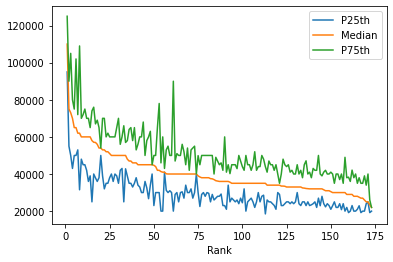

In [2]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"]);

`.plot()` devuelve un gráfico de líneas que contiene los datos de cada fila del DataFrame. Los valores del eje x representan el rango de cada institución, y los valores `"P25"`, `"Mediana"` y `"P75"` se trazan en el eje y.

Si se observa el gráfico, se pueden hacer las siguientes observaciones:

- La mediana de los ingresos disminuye a medida que se baja en el ranking. Esto es de esperar porque el ranking está determinado por la mediana de los ingresos.

- Algunas carreras tienen grandes diferencias entre los percentiles 25 y 75. Las personas con estas titulaciones pueden ganar mucho menos o mucho más que la mediana de los ingresos.

- Otras carreras tienen diferencias muy pequeñas entre los percentiles 25 y 75. Las personas con estas titulaciones ganan sueldos muy cercanos a la renta mediana.

- El primer gráfico ya insinúa que hay mucho más que descubrir en los datos. Algunas carreras tienen un amplio abanico de ingresos y otras tienen un abanico más bien estrecho. Para descubrir estas diferencias, utilizaremos otros tipos de gráficos.

### El método `.plot()`

`.plot()` tiene varios parámetros opcionales. En particular, el parámetro `"kind"` acepta once valores de cadena diferentes y determina el tipo de gráfico que se creará:

- `"area"` es para gráficos de área.
- `"bar"` es para gráficos de barras verticales.
- `"barh"` es para gráficos de barras horizontales.
- `"box"` es para gráficos de caja.
- `"hexbin"` es para los gráficos hexagonales.
- `"hist"` es para histogramas.
- `"kde"` es para gráficos de estimación de densidad del núcleo.
- `"density"` es un alias de "kde".
- `"line"` es para los gráficos de líneas.
- `"pie"` es para gráficos de tarta.
- `"scatter"` es para gráficos de dispersión.

El valor por defecto es `"line"`. Los gráficos de líneas, como el que se ha creado arriba, proporcionan una buena visión general de sus datos. Puede utilizarlos para detectar tendencias generales. Rara vez proporcionan una visión sofisticada, pero pueden darle pistas sobre dónde ampliar los datos.

Si no proporciona un parámetro a `.plot()`, entonces se crea un gráfico de líneas con el índice en el eje x y todas las columnas numéricas en el eje y. Aunque esto es útil por defecto para conjuntos de datos con sólo unas pocas columnas, para el conjunto de datos de carreras universitarias y sus varias columnas numéricas, parece todo un lío.

**NOTA**: Como alternativa a pasar cadenas al parámetro kind de .plot(), los objetos DataFrame tienen varios métodos que se pueden utilizar para crear los distintos tipos de gráficos descritos anteriormente:

- `.area()`
- `.bar()`
- `.barh()`
- `.box()`
- `.hexbin()`
- `.hist()`
- `.kde()`
- `.densidad()`
- `.line()`
- `.pie()`
- `.dispersión()`

Text(80, 400000, 'local maximum')

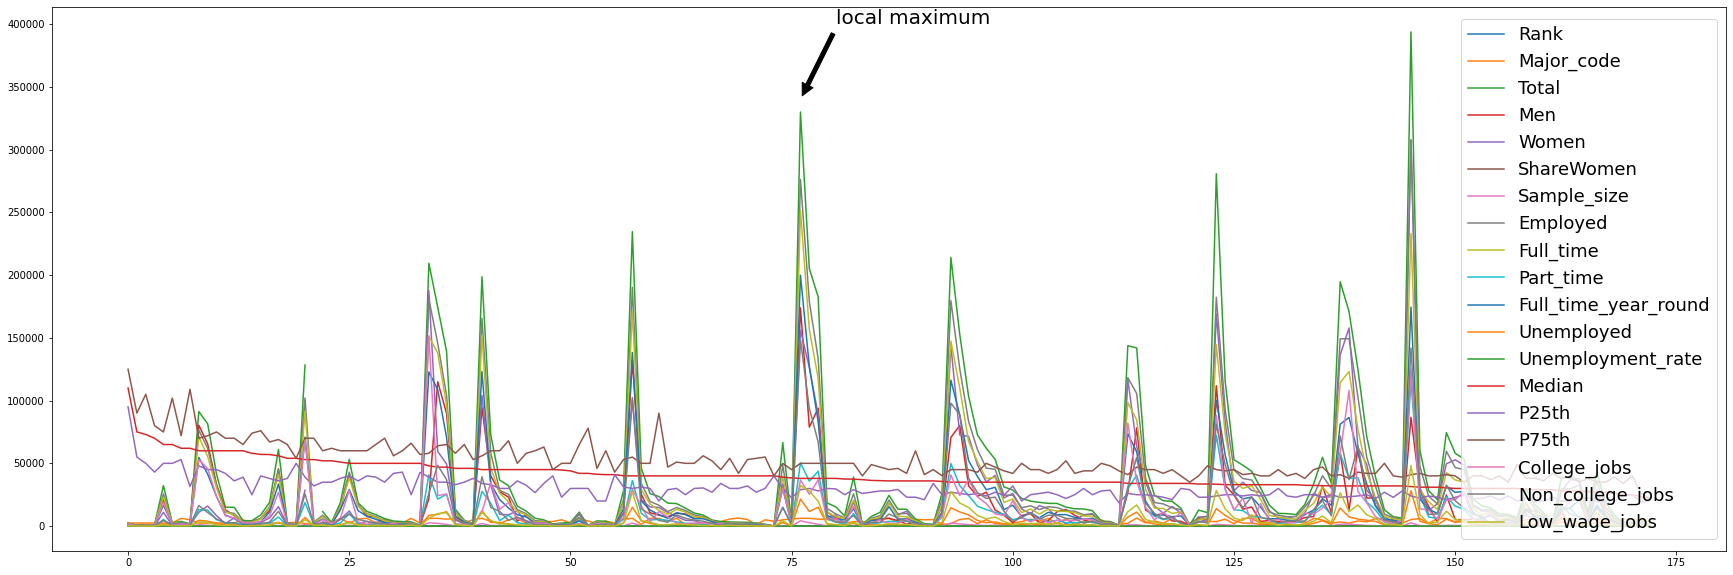

In [25]:
df.plot(legend=True, figsize=(30, 10))
plt.legend(fontsize=18, loc='right')
# plt.text(75, 350000, "Hola", fontsize=20, ha='center')
plt.annotate('local maximum', xy=(76, 340000), xytext=(80, 400000),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)

Text(80, 400000, 'local maximum')

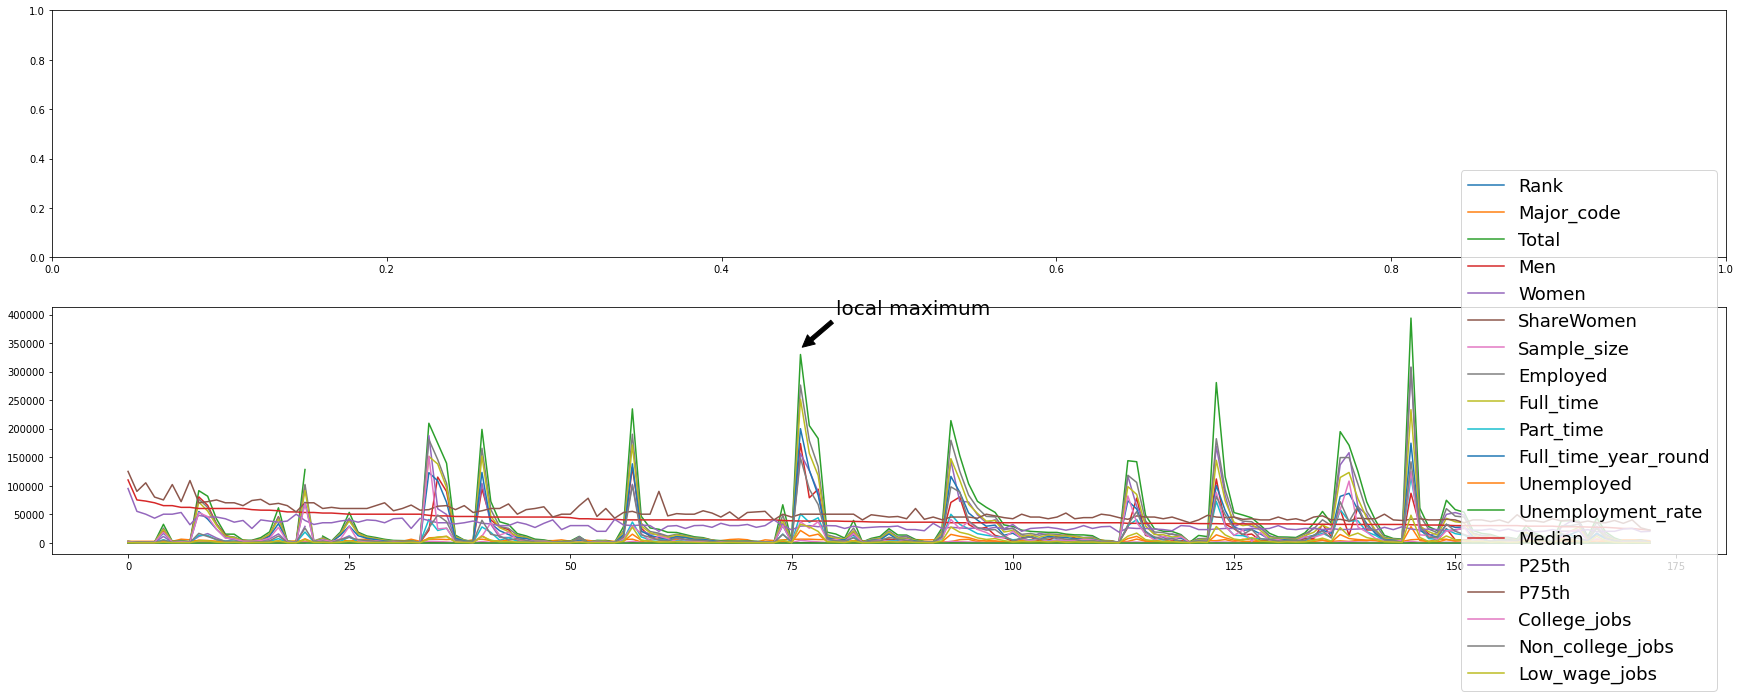

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(30, 10))
df.plot(legend=True, figsize=(30, 10), ax=ax[1])
ax[1].legend(fontsize=18, loc='right')
# plt.text(75, 350000, "Hola", fontsize=20, ha='center')
ax[1].annotate('local maximum', xy=(76, 340000), xytext=(80, 400000),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)

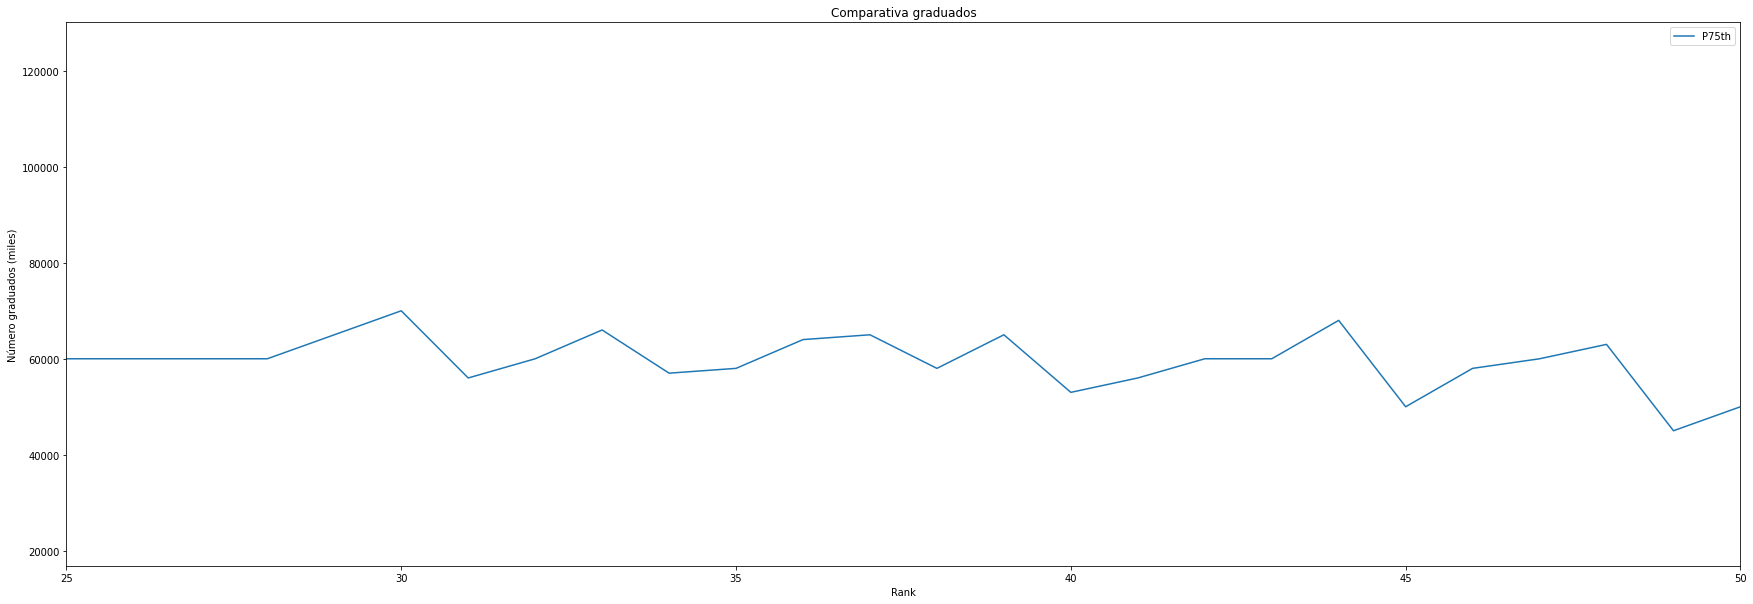

In [35]:
def format_fun(ax, xlabel="Mi label", title="Comparativa graduados", ylabel="Número graduados (miles)", **kwargs):
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title, **kwargs)
    return ax

fig, ax = plt.subplots(figsize=(30, 10))
ax = format_fun(ax, xlim=(25, 50))

df.plot(x="Rank", y="P75th", ax=ax);

<AxesSubplot:title={'center':'Esta con pandas'}, xlabel='Rank'>

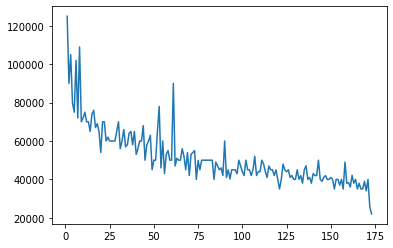

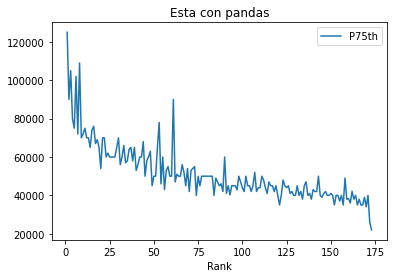

In [29]:
# Es completamente equivalente a usar directamente el método plot de matplotlib

plt.plot(df["Rank"], df["P75th"])
df.plot(x="Rank", y="P75th", title="Esta con pandas")

### Histogramas

El histograma muestra los datos agrupados en diez intervalos que van de 20.000 a 120.000 dólares, y cada intervalo tiene una anchura de 10.000 dólares. El histograma tiene una forma diferente a la distribución normal, que tiene una forma de campana simétrica con un pico en el centro.

El histograma de los datos de la mediana, sin embargo, tiene un pico a la izquierda por debajo de los 40.000 dólares. La cola se extiende mucho hacia la derecha y sugiere que, efectivamente, hay campos en los que se pueden esperar ganancias significativamente mayores.

Text(0.5, 1.0, 'Median Salaries Distribution')

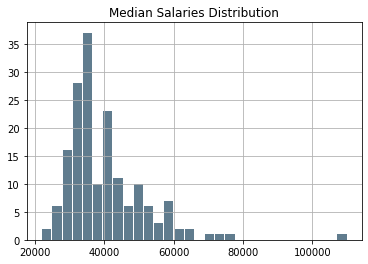

In [15]:
df['Median'].hist(bins=30, grid=True, rwidth=0.9,
                   color='#607c8e')
plt.title("Median Salaries Distribution")

Ahora, con un `bar chart` vamos a mostrar cuáles son los sectores más lucrativos sacando un top 5.

In [37]:
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


<AxesSubplot:xlabel='Major'>

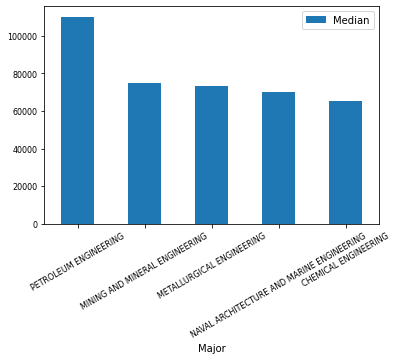

In [43]:
# Con rot decimos los ángulos de rotación de las etiquetas y con fontsize el tamaño
top_5.plot(x="Major", y="Median", kind="bar", rot=30, fontsize=8)

ste gráfico muestra que el salario mediano de las carreras de ingeniería petrolífera es más de 20.000 dólares superior al del resto. Los ingresos de las especialidades que ocupan los puestos segundo a cuarto están relativamente próximos entre sí.

Si tienes un punto de datos con un valor mucho más alto o más bajo que el resto, probablemente querrás investigar un poco más. Por ejemplo, puedes mirar las columnas que contienen datos relacionados.

Investiguemos todas las carreras cuya mediana salarial es superior a 60.000 dólares. En primer lugar, debe filtrar estas carreras con la máscara df[df["Mediana"] > 60000]. A continuación, puede crear otro gráfico de barras que muestre las tres columnas de ingresos:

<AxesSubplot:xlabel='Major'>

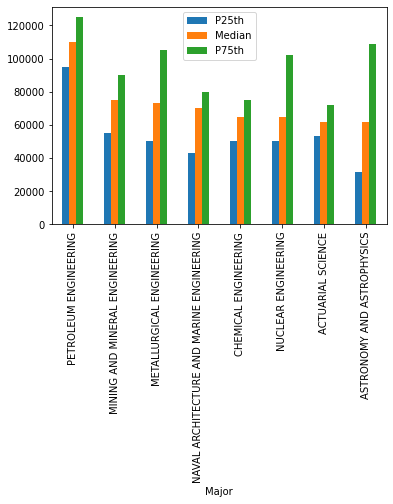

In [23]:
top_medians = df[df["Median"] > 60000].sort_values("Median", ascending=False)
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

Los percentiles 25 y 75 confirman lo que se ha visto anteriormente: los licenciados en ingeniería petrolera son, con diferencia, los mejor pagados.

¿Por qué deberían interesarte tanto los valores atípicos en este conjunto de datos? Si eres un estudiante universitario que está pensando en qué carrera elegir, tienes al menos una razón bastante obvia. Pero los valores atípicos también son muy interesantes desde el punto de vista del análisis. Pueden indicar no sólo industrias con abundancia de dinero, sino también datos no válidos.

## Comprobar correlaciones

En muchas ocasiones queremos conocer la relación entre las distintas variables. Para ello se lleva a cabo un análisis de correlaciones.

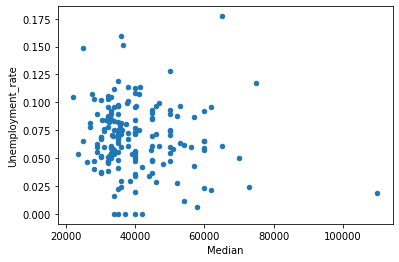

In [25]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter");

Un rápido vistazo a esta figura muestra que **no hay una correlación significativa entre los ingresos y la tasa de desempleo**.

Aunque un gráfico de dispersión es una herramienta excelente para obtener una primera impresión sobre una posible correlación, no es una prueba definitiva de una conexión. Para obtener una visión general de las correlaciones entre diferentes columnas, puede utilizar `.corr()`. Si sospecha que existe una correlación entre dos valores, tiene varias herramientas a su disposición para verificar su corazonada y medir lo fuerte que es la correlación.

Tenga en cuenta, sin embargo, que aunque exista una correlación entre dos valores, no significa que un cambio en uno de ellos provoque un cambio en el otro. En otras palabras, **la correlación no implica causalidad**.

In [44]:
df.corr()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.108429,0.071137,-0.094780,0.174913,0.643781,0.008492,0.070751,0.034725,0.193174,0.020418,0.090078,0.068900,-0.873308,-0.735688,-0.802686,0.052639,0.144689,0.202920
Major_code,0.108429,1.000000,0.196784,0.179299,0.181459,0.259211,0.206580,0.200925,0.199397,0.195184,0.205634,0.223418,0.126603,-0.176072,-0.166864,-0.094556,0.041198,0.232425,0.225294
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.008492,0.206580,0.945575,0.875176,0.862606,0.097496,1.000000,0.964462,0.978396,0.824824,0.985235,0.918059,0.059872,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Employed,0.070751,0.200925,0.996214,0.870605,0.944037,0.147547,0.964462,1.000000,0.995838,0.934528,0.991047,0.968900,0.068056,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.034725,0.199397,0.989339,0.893563,0.917681,0.120200,0.978396,0.995838,1.000000,0.900877,0.998203,0.960102,0.063349,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.193174,0.195184,0.950268,0.751592,0.954513,0.212290,0.824824,0.934528,0.900877,1.000000,0.880855,0.945094,0.108944,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593


In [60]:
df["inv_rank"] = 1 / df['Rank'] ** 0.002

<AxesSubplot:xlabel='inv_rank'>

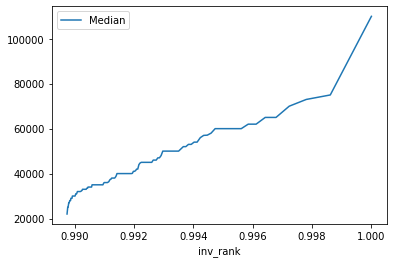

In [61]:
df.plot(x="inv_rank", y='Median')

In [62]:
df.corr()[['Median']].abs().sort_values(by='Median', ascending=False)

,Median
Median,1.000000
inv_rank,0.982504
P75th,0.901923
P25th,0.891683
Rank,0.873308
ShareWomen,0.618690
Low_wage_jobs,0.209431
Part_time,0.190124
Women,0.182842
Major_code,0.176072


Text(0.5, 1.0, 'Correlaciones con variable Median')

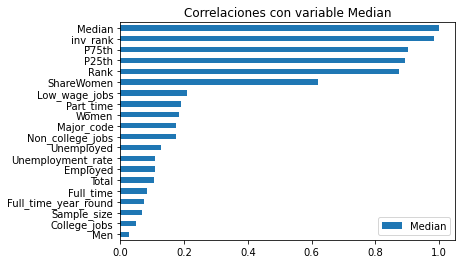

In [65]:
df.corr()[['Median']].abs().sort_values(by=['Median'], ascending=True).plot(kind='barh')
plt.title('Correlaciones con variable Median')

## Análisis de datos categóricos

Podemos usar técnicas como la agrupación para conocer cómo de populares son las distintas categorías de grado.

In [67]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

Text(0.5, 1.0, 'Número de estudiantes por sector')

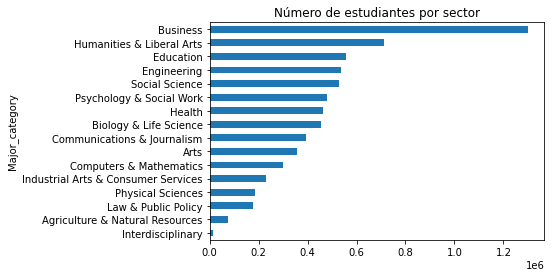

In [68]:
cat_totals.plot(kind="barh", fontsize=10)
plt.title("Número de estudiantes por sector")

Como muestra su gráfico, los negocios son, con diferencia, la categoría de especialización más popular. Mientras que las humanidades y las artes liberales ocupan el segundo lugar, el resto de los campos tienen una popularidad más similar.

Podemos mostrar los ratios en un piechart pero tenemos el problema de que aparecen muchas categorías con poca contribución.

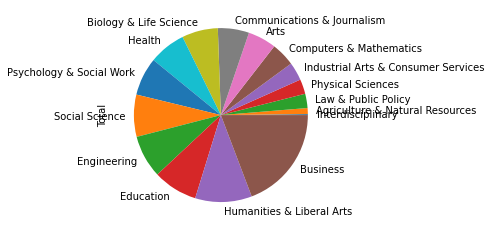

In [69]:
cat_totals.plot(kind='pie');

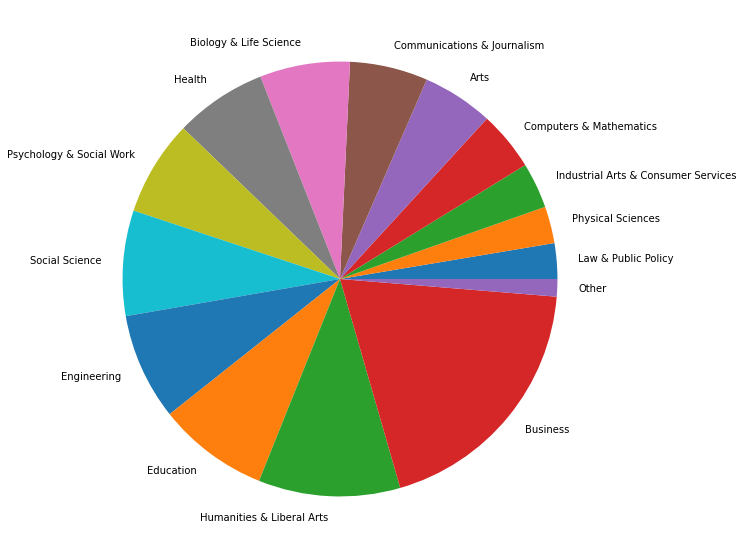

In [73]:
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]

# Adding a new item "Other" with the sum of the small categories
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="", figsize=(30, 10));

La categoría "Otros" sigue siendo una parte muy pequeña del pastel. Eso es una buena señal de que la fusión de esas pequeñas categorías fue la decisión correcta.

# Zoom sobre determinadas categorías

A veces también se quiere verificar si una determinada categorización tiene sentido. ¿Son los miembros de una categoría más parecidos entre sí que con el resto del conjunto de datos? De nuevo, una distribución es una buena herramienta para obtener una primera visión general. En general, esperamos que la distribución de una categoría sea similar a la distribución normal, pero que tenga un rango menor.

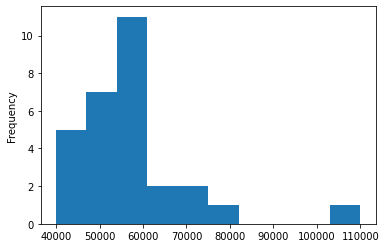

In [61]:
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist");


In [76]:
df[(df["Major_category"] == "Engineering")&(df["Median"] > 60000)]['Major'].unique()

array(['PETROLEUM ENGINEERING', 'MINING AND MINERAL ENGINEERING',
       'METALLURGICAL ENGINEERING',
       'NAVAL ARCHITECTURE AND MARINE ENGINEERING',
       'CHEMICAL ENGINEERING', 'NUCLEAR ENGINEERING'], dtype=object)

El rango de la mediana de los ingresos principales es algo menor, ya que comienza en 40.000 dólares. La distribución se acerca más a la normal, aunque su pico sigue estando a la izquierda. Así que, aunque hayas decidido elegir una especialidad de la categoría de ingeniería, sería conveniente que profundizaras y analizaras tus opciones más a fondo.

# Conclusión

Ya hemos aprendido cómo empezar a visualizar su conjunto de datos utilizando `Python` y la biblioteca `pandas`. Hemos visto cómo algunos gráficos básicos pueden darle una visión de los datos y guiar su análisis.

Hemos visto:

- Obtener una visión general de la distribución de su conjunto de datos con un histograma
- Descubrir la correlación con un gráfico de dispersión
- Analizar las categorías con gráficos de barras y sus proporciones con gráficos circulares
- Determinar qué gráfico es el más adecuado para su tarea actual
- Utilizando .plot() y un pequeño DataFrame, ha descubierto bastantes posibilidades para proporcionar una imagen de sus datos. Ahora está listo para construir sobre este conocimiento y descubrir visualizaciones aún más sofisticadas.